# NAR script
_______________________________________

Julian Fuchs
______________________________________________________________

### Info

Ctot based on SMS method by Bollmann et al. 1999

LSR = linear sedimentation rate;
DBD = dry bulk density;
Mweight = weight microbeads per slide;
Sweight = weight sediment per slide;
Mcount = number of counted beads;
Ccount = number of counted coccoliths;
Ctot = total number of Coccoliths;
NAR = nannolith accumulation rate;
CAR = carbonate accumulation rate


### modules

In [31]:
import math
import pandas as pd
import matplotlib.pyplot as plt

### Load your excel file

Excel file needs to contain columns for: sample name, age, LSR, DBD, Mweight, Sweight, Mcount, Ccount. 


In [32]:
dfNARdata = pd.read_excel('Data/MyData/198SR_NARdata.xlsx')

dfNARdata.iloc[0]  #displays all columns for one sample just to check the data frame

ID#                          1.0
Sample     198-1209A-14H-1-W 0/2
Age                    33.362115
LSR                         0.68
DBD                         1.05
Mweight                 0.000629
Sweight                 0.003091
Mcount                     320.0
Ccount                     208.0
Name: 0, dtype: object

### Provide information on microbeads used in the method & scale accuracy

In [33]:
#defining variables for the microbeads. Input radius, density and variance here:

beadradius = 1.4055E-4 #radius microbeads in cm 
beaddensity = 1.05 #density microbeads g/cm^3 
var_beadradius = (0.089E-4)**2 * (1/4) #diameter standard deviation is 0.089 um, here in cm

#define variance for weighing here:

var_Mweight = (1.0E-6)**2 #accuracy of scale is 1 ug, here in g
var_Sweight = var_Mweight

### Calculate Mtot 
(total microbeads)

In [34]:
def calculate_Mtot(Mweight):
    beadweight = (4/3) * math.pi * beadradius**3 * beaddensity
    Mtot = Mweight / beadweight 
    return Mtot

dfNARdata['Mtot'] = calculate_Mtot(dfNARdata['Mweight'])

### Calculate variance of Mtot 
see Bollmann et al. 1999 for details

In [35]:
def calculate_varianceMtot(Mweight): 
    beadweight = (4/3) * math.pi * beadradius**3 * beaddensity
    var_r3 = 3 * beadradius**4 * var_beadradius
    var_beadvolume = ((4/3) * math.pi)**2 * var_r3
    var_beadmass = beaddensity**2 * var_beadvolume
    var_Mtot = (1/beadweight) * (var_Mweight + (Mweight / beadweight)**2 * var_beadmass) 
    return var_Mtot

dfNARdata['var_Mtot'] = calculate_varianceMtot(dfNARdata['Mweight'])

def calculate_percentage_varMtot(var_Mtot, Mtot):
    var_Mtot_per = (var_Mtot / Mtot) * 100
    return var_Mtot_per

dfNARdata['var_Mtot_per'] = calculate_percentage_varMtot(dfNARdata['var_Mtot'], dfNARdata['Mtot'])
    

### Calculate Ctot 
(total coccoliths per gram sediment)

In [36]:
def calculate_Ctot(Ccount, Mcount, Mtot, Sweight): 
    Ctot = (Ccount / Mcount) * (Mtot / Sweight)
    return Ctot

dfNARdata["Ctot"] = calculate_Ctot(dfNARdata["Ccount"], dfNARdata["Mcount"], dfNARdata["Mtot"], dfNARdata["Sweight"]) 

### Calculate NAR 
(Nannolith accumulation rate)

In [55]:
def calculate_NAR(Ctot, LSR, DBD):
    NAR = Ctot * LSR * DBD
    return NAR

dfNARdata['NAR'] = calculate_NAR(dfNARdata['Ctot'], dfNARdata['LSR'], dfNARdata['DBD'])

In [56]:
dfNARdata

ID#                    Sample         Age       LSR    DBD   Mweight  \
0    1.0      198-1209A-14H-1-W 0/2  33.362115  0.680000  1.050  0.000629   
1    2.0    198-1209A-14H-2-W 30/32  33.626943  0.679688  1.010  0.000605   
2    3.0    198-1209A-14H-3-W 79/81  33.925067  0.667506  1.080  0.000561   
3    4.0  198-1209A-14H-4-W 130/132  34.260566  0.599107  1.090  0.000669   
4    4.1    198-1209A-14H-5-W 60/62  34.394098  0.599107  1.020  0.000445   
5    4.2      198-1209A-14H-6 10/12  34.561013  0.599107  0.960  0.000416   
6    5.0      198-1209A-14H-6 28/30  35.315806  0.023848  0.940  0.000556   
7    5.1      198-1209A-14H-6 90/92  35.915806  0.103333  0.940  0.000428   
8    5.2    198-1209A-14H-6 132/134  36.322258  0.103333  1.030  0.000427   
9    5.3    198-1209A-15H-1-W 22/24  37.831935  0.103333  1.150  0.000387   
10   6.0    198-1209A-15H-1-W 77/79  38.364194  0.103333  1.230  0.000632   
11   6.1  198-1209A-15H-1-W 138/140  38.954516  0.103333  1.200  0.000418   
12   6.2    198-1209A-15H-2-W 68/70  39.728710  0.103333  1.300  0.000408   
13   7.0  198-1209A-15H-2-W 131/133  40.324794  0.105690  0.930  0.000502   
14   7.1    198-1209A-15H-3-W 38/40  40.468613  0.396330  0.930  0.000384   
15   7.2  198-1209A-15H-3-W 118/120  40.670465  0.396330  0.930  0.000409   
16   8.0    198-1209A-15H-4-W 29/31  40.824377  0.396330  0.990  0.000517   
17   9.0    198-1209A-15H-5-W 78/80  41.326483  0.396330  1.130  0.000536   
18  10.0    198-1209A-15H-7-W 30/32  41.836159  0.396330  1.140  0.000492   
19  14.0    198-1209A-16H-2-W 37/39  42.694029  0.396330  1.100  0.000587   
20  18.0    198-1209A-16H-3-W 31/33  43.057362  0.396330  1.110  0.000539   
21  19.0  198-1209A-16H-3-W 107/109  43.249122  0.396330  1.110  0.000625   
22  21.0  198-1209A-16H-4-W 142/144  43.715904  0.396330  1.080  0.000579   
23  22.0    198-1209A-16H-6-W 41/43  44.218010  0.396330  1.070  0.000490   
24  24.0     198-1209C-6H-3-W 48/50  44.321459  0.396330  1.070  0.000684   
25  26.0   198-1209B-17H-3-W 99/101  45.123820  0.396330  1.090  0.000498   
26  29.0    198-1209A-17H-5-W 77/79  46.418429  0.673623  1.150  0.000628   
27  37.0    198-1209B-18H-4-W 87/89  47.130318  0.731856  1.280  0.000513   
28  45.0  198-1209A-18H-4-W 117/119  47.782086  0.731856  1.250  0.000621   
29  52.0    198-1209B-19H-4-W 27/29  48.615584  0.731856  1.180  0.000582   
30  62.0  198-1209B-20H-1-W 120/122  49.707329  0.731856  1.310  0.000521   
31  62.1    198-1209B-20H-3-W 95/97  50.083086  0.731856  1.310  0.000451   
32  63.0  198-1209B-20H-4-W 120/122  50.322205  0.731856  1.240  0.000518   
33  63.1  198-1209B-20H-5-W 147/149  50.564056  0.731856  1.240  0.000451   
34  64.0  198-1209C-10H-2-W 137/139  51.228960  0.533911  1.220  0.000740   
35  64.1  198-1209B-21H-2-W 134/136  52.079009  0.305865  1.220  0.000424   
36  65.0    198-1209B-21H-4-W 97/99  52.938867  0.305865  1.220  0.000628   
37  65.1    198-1209B-21H-5-W 92/94  53.412933  0.305865  1.220  0.000448   
38  66.0    198-1209B-21H-6-W 89/91  54.451878  0.112393  1.220  0.000558   
39  67.0    198-1209C-11H-5-W 22/24  55.488977  0.476297  1.200  0.000551   
40  68.0    198-1209A-22H-4-W 71/73  56.599783  0.442922  1.230  0.000669   
41  69.0    198-1209C-12H-5-W 27/29  58.487287  0.355496  1.224  0.000576   
42  70.0    198-1209B-23H-6-W 37/39  59.222527  0.535879  1.220  0.000563   
43  71.0    198-1209B-24H-2-W 24/26  60.374013  0.431616  1.220  0.000511   
44  72.0    198-1209B-24H-4-W 72/74  61.257309  0.393979  1.220  0.000579   
45  73.0    198-1209B-24H-7-W 58/60  62.181835  0.471593  1.220  0.000655   
46  74.0  198-1209B-25H-2-W 135/137  63.106364  0.472673  1.220  0.000500   
47  75.0  198-1209B-25H-4-W 113/115  64.040041  0.297747  1.220  0.000544   
48  76.0  198-1209C-15H-1-W 140/142  65.194995  0.308237  1.220  0.000564   
49  77.0    198-1209C-15H-5-W 53/55  66.527287  0.347521  1.220  0.000550   
50   NaN                        NaN        NaN       NaN    NaN       NaN   



### let's safe the new data as a new file

In [39]:
dfNARdata.to_excel('Data/MyData/198SR_NARdata1.xlsx')

### Plotting NAR and comparing it with carbonate accumulation rates (CAR)

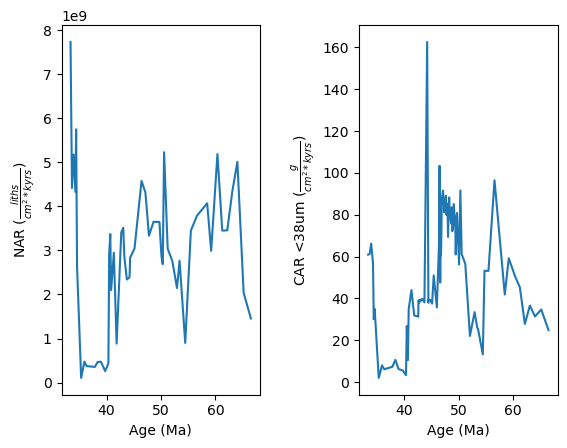

In [53]:
dfCARdata = pd.read_excel('Data/CARdata1.xlsx') #load the CAR data

fig, (ax1, ax2) = plt.subplots(1, 2, sharey = False) #sharey defines if they should have the same y-axis
fig.subplots_adjust(wspace = 0.5) #creates a defined space between the two plots

ax1.plot(dfNARdata['Age'], dfNARdata['NAR'])
ax2.plot(dfCARdata['Age'], dfCARdata['CAR_fine'])
ax1.set(xlabel = 'Age (Ma)', ylabel =r'NAR ($\frac{liths}{cm^2 * kyrs}$)')
ax2.set(xlabel = 'Age (Ma)', ylabel =r'CAR <38um ($\frac{g}{cm^2 * kyrs}$)')
plt.show()

### let's plot them together in one figure

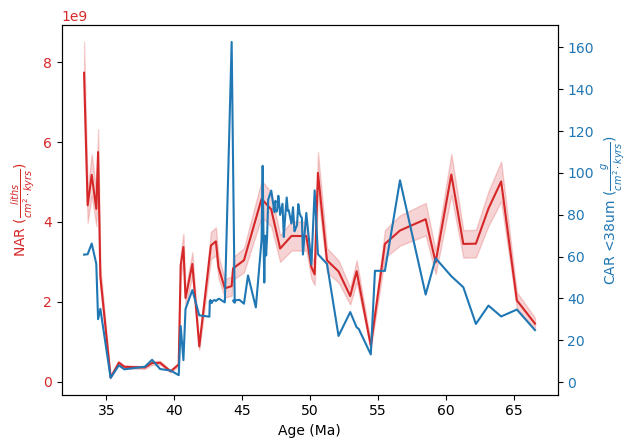

In [51]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Age (Ma)')
ax1.set_ylabel(r'NAR ($\frac{liths}{cm^2 \cdot kyrs}$)', color='tab:red')

ax1.plot(dfNARdata['Age'], dfNARdata['NAR'], color='tab:red')
NAR_error_percentage = 10  #set the error percentage
NAR_error_values = dfNARdata['NAR'] * (error_percentage / 100)  #Calculate error values
ax1.fill_between(dfNARdata['Age'], dfNARdata['NAR'] - NAR_error_values, dfNARdata['NAR'] + NAR_error_values, alpha=0.2, color='tab:red')  # Add shaded error region to NAR plot
ax1.tick_params(axis='y', labelcolor='tab:red')


ax2 = ax1.twinx()  #creates a second axis that shares the same x-axis

ax2.set_ylabel(r'CAR <38um ($\frac{g}{cm^2 \cdot kyrs}$)', color='tab:blue')  #we already named the x-label with ax1
ax2.plot(dfCARdata['Age'], dfCARdata['CAR_fine'], color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.savefig('Data/MyData/superdupercoolfrickingplot.pdf')  #save the figure as a pdf or image file

plt.show()